# Housing Prices Competition for Kaggle Learn Users

## The Challenge

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Source: https://www.kaggle.com/competitions/home-data-for-ml-course

In this notebook we will predict the final price of each home in the test dataset with a linear regression model applying data science techniques along the way.

## 1. Early EDA (Exploratory Data Analysis)

### 1.1. Imports

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt


In [115]:
test_data = pd.read_csv("/home/nzuleta/dataScience/Data-Science-Portfolio/data/home-data-for-ml-course/test.csv")
train_data = pd.read_csv("/home/nzuleta/dataScience/Data-Science-Portfolio/data/home-data-for-ml-course/train.csv")

### 1.2. Understanding the data

First we get a general overview  of our train dataset.

In [116]:
#ckeck the first 10 rows of the training data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
#check the columns of the training data
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [118]:
#check general info of the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [119]:
#common statistics of the training data
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [120]:
#check for duplicates
train_data.duplicated().sum()
print("There are {} duplicated rows in the dataset".format(train_data.duplicated().sum()))

There are 0 duplicated rows in the dataset


In [121]:
#count the number of quantative and qualitative variables
quantitative = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
qualitative = [f for f in train_data.columns if train_data.dtypes[f] == 'object']
print("There are {} quantitative features and {} qualitative features for a total of {} features".format(len(quantitative), len(qualitative), len(quantitative)+len(qualitative)))

There are 38 quantitative features and 43 qualitative features for a total of 81 features


<AxesSubplot: >

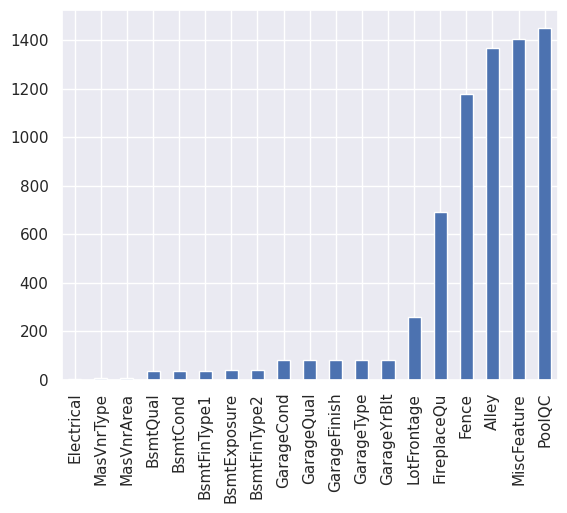

In [122]:
#plot columns with missing values
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

We can see that the dataset contains 5 columns with more than 600 missing values like PoolQC, MiscFeature, Alley, Fence and others. These variables are probably not going to be used for our model. We will deal with these later....

Now lets explore our target variable: **SalePrice**.

In [123]:
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

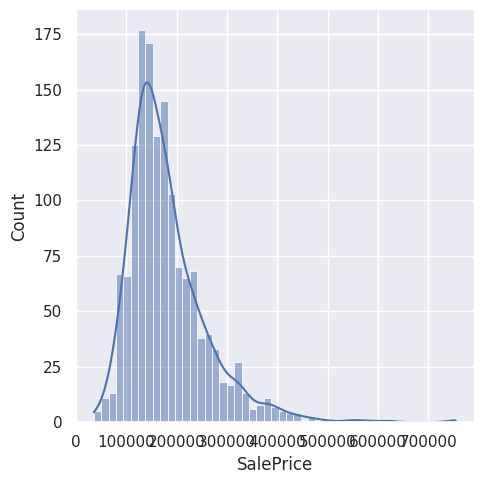

In [124]:
sns.displot(train_data.SalePrice, kde=True)

We can see that SalePrice doesn't follow a Normal Distribution, and visually it appear as if it has positive Skewness and Kurtosis, let's check:

In [125]:
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Confirmed: the SalePrice variable has positive Skewness and Kurtosis.

Now lets check the relationships between SalePrice and the other variables of the dataset, for this we will use a heatmap plot to get a quick view:

/tmp/ipykernel_24274/1577613530.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


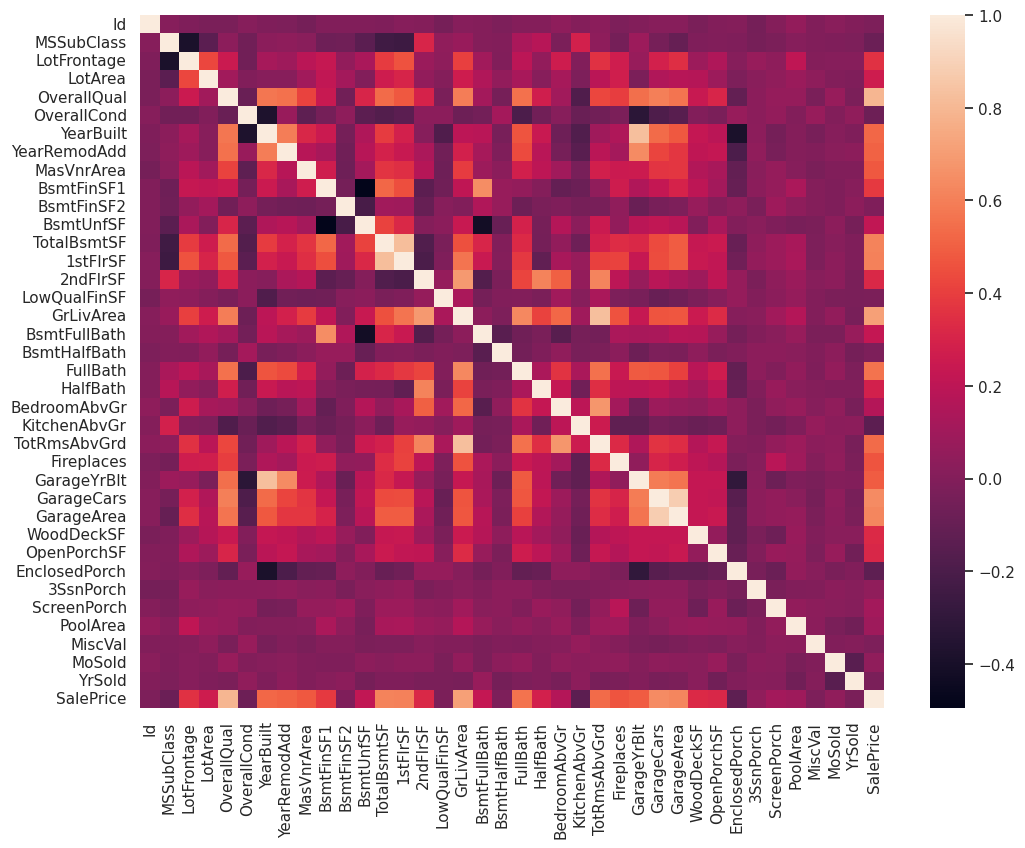

In [126]:
#generate a correlation matrix
corr = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr);

The heatmap shows that there are variables with strong correlations with the SalePrice variable like OverallQuall, GrLivArea, TotalBsmtSF and 1stFlrSF. Lets zoom in a little bit to check the top 10 variables with the strongest correlation with our target variable.

In [127]:
#get the top 10 variables with the strongest correlation with our target variable
top10corr = corr.nlargest(10, 'SalePrice')['SalePrice'].index
top10corr

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

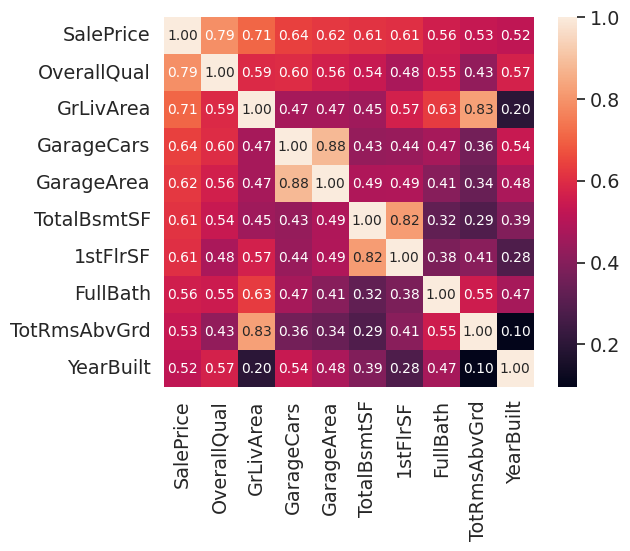

In [128]:
#plot the top 10 correlated variables
corr10 = np.corrcoef(train_data[top10corr].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(corr10, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=top10corr.values, xticklabels=top10corr.values)
plt.show()

With this we can analyze the variables and select the ones that we will use in the model. There are a few variables that are similar to each other like:
- GarageArea and GarageCars (they even have similar correlation with SalePrice), having both variables would affect our model negatively so we will select GarageCars only.
- TotalBsmtSF and 1srFlrSF are practically the same variable so we will only select TotalBsmtSF.
- TotRmsAbvGrd and GrLivArea same situation, we will only use GrLivArea.

That means that the variables that we are going to use are: OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath and YearBuilt. Lets see how they look against each other and our target variable.

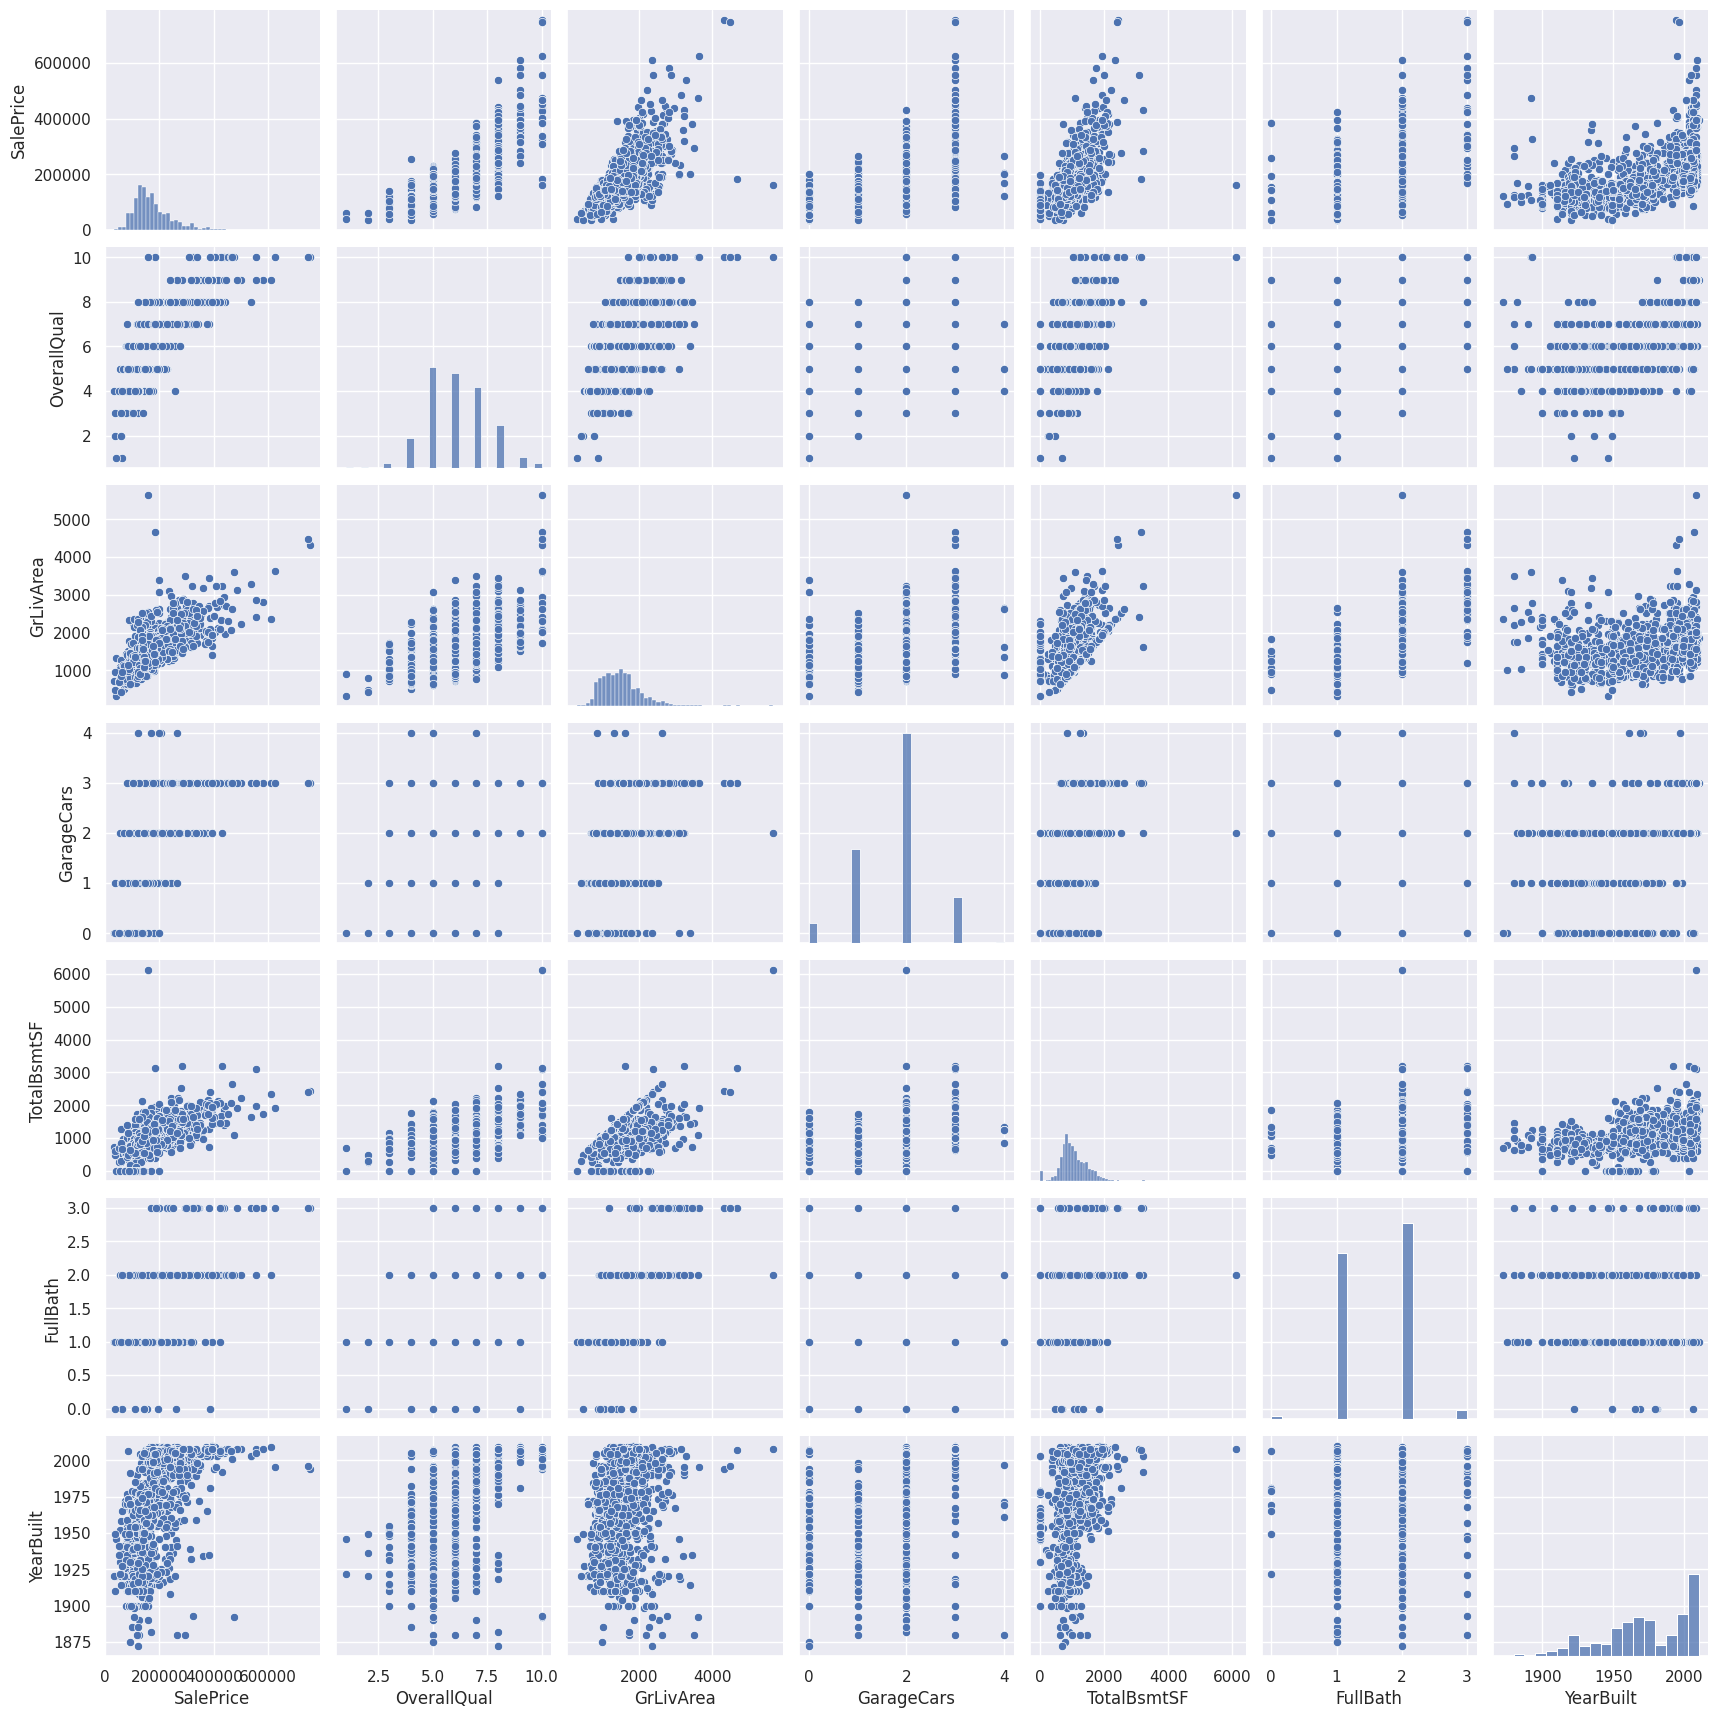

In [129]:
#plot scatterplots
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], height = 2.5)
#change the position of the x legend to be on top of the plot
plt.show();

## 2. Data Cleaning

### 2.1. Missing Data

To be able to make decisions on how to treat the variables with missing values we are going to calculate the amount of missing values and the percentage that those missing values make of the variable.

In [130]:
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Looking at the missing data we can then delete the variables that have more than 15% of the data missing. We can also delete all of the garage and basement variables since we already checked that GarageCars and TotalBsmtSF are the essential variables on those categories because they basically group all of the other variables related. That leaves us with the MasVnrArea, MasVnrType and Electrical variables, we will delete the MasVnrArea and MasVnrType variables since they are not important. For the Electrical variable since its just 1 observation missing we will delete it and leave the others.

In [131]:
#dealing with missing data
train_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_data = train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)

/tmp/ipykernel_24274/1982877765.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index,1)


0